# Importance sampling

Importance sampling is a way of evaluating expectation values w.r.t. a distribution. Unlike sampling methods like rejection sampling, it produces weighted samples rather than samples of equal weight.

Assume that we are interested in evaluating the expectation value of a function $A(X)$ of a random variable $X$ w.r.t. a distribution $f(x)$. Further, assume that we only know the distribution up to a constant factor, i.e., $f'(x)=C f(x)$.

The expectation value of $A(X)$ w.r.t. $f(x)$ is

$\mathbb{E}_f[A(X)] = \int A(x) f(x) dx = \frac{1}{C}\int A(x) f'(x) dx$

Suppose we have a distribution $g(x)$ that we can sample easily. Then, the expectation value can be written as

$\mathbb{E}_{f}[A(X)]=\frac{1}{C}\int A(x)\frac{f'(x)}{g(x)}g(x)dx=\frac{1}{C}\mathbb{E}_{g}\left[A(x)\frac{f'(x)}{g(x)}\right]$

If we replace $A(X)=1$, we will have

$\mathbb{E}_{f}[1]=\frac{1}{C}\mathbb{E}_{g}\left[\frac{f'(x)}{g(x)}\right]$

i.e., $C=\mathbb{E}_{g}\left[\frac{f'(x)}{g(x)}\right]$.

Therefore,

$\mathbb{E}_{f}[A(X)]=\frac{\mathbb{E}_{g}\left[A(x)\frac{f'(x)}{g(x)}\right]}{\mathbb{E}_{g}\left[\frac{f'(x)}{g(x)}\right]}$

If we draw samples $x_i$ from $g(x)$ and define the weights $w_i = f'(x_i)/g(x_i)$, we can approximate this as

$\mathbb{E}_{f}[A(X)]=\frac{\frac{1}{N}\sum_{i=1}^{N}A(x_{i})w_{i}}{\frac{1}{N}\sum_{i=1}^{N}w_{i}}=\left(\sum_{j=1}^{N}w_{j}\right)^{-1}\sum_{i=1}^{N}A(x_{i})w_{i}$

This assumes that $g(x)$ is non-zero everywhere in the support of $f(x)$.

Since most of what we do with samples is to compute expectation values, we can use the sample-weight pairs $(x_i,w_i)$ in pretty much the same way.

Now, an implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fprime(x):
    return (1-np.abs(x)) * np.heaviside(1-np.abs(x), 0)

C = 1.0

def g(x):
    # Normal distribution with sigma=1/2
    return np.exp(-x**2/2*4) / np.sqrt(2*np.pi/4)

In [2]:
def sample(N):
    samples = []
    weights = []
    for i in range(N):
        x = np.random.randn() / 2 # Draw from g(x)
        w = fprime(x) / g(x)
        samples.append(x)
        weights.append(w)
    return samples, weights

In [3]:
xs, ws = sample(10000)

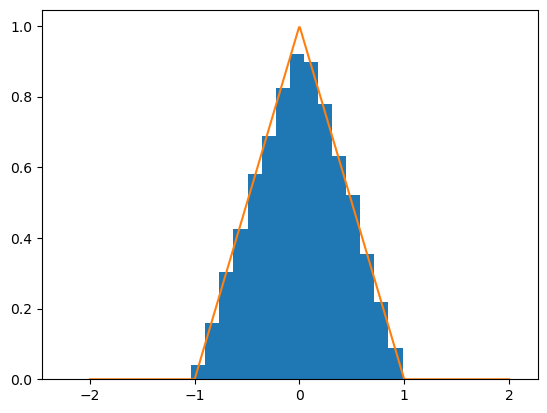

In [4]:
plt.hist(xs, weights=ws, density=True, bins=32)
x = np.linspace(-2, 2, 500)
plt.plot(x, fprime(x), label="target")

The advantage of importance sampling over rejection sampling is that it does not throw away any data. Further, it is more efficient at exploring the low-probability regions of the parameter space. OTOH, it is not easy to find an appropriate $g(x)$ for most real world applications. 

## 2D example

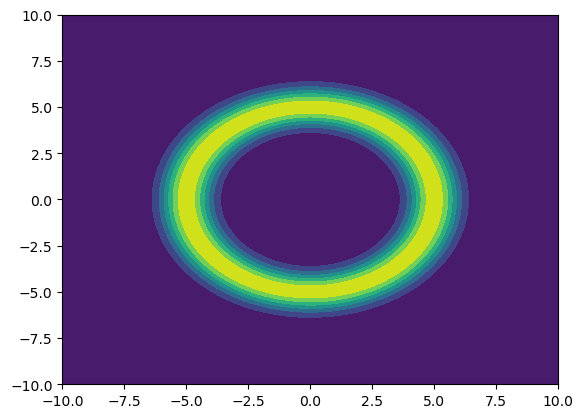

In [5]:
def fprime1(params):
    x, y = params
    u = np.sqrt(x*x + y*y)
    return np.exp(-(u-5)**2)

x, y = np.meshgrid(np.linspace(-10, 10, 5000), np.linspace(-10, 10, 5000))
z = fprime1((x, y))
plt.contourf(x, y, z)

In [6]:
def g1(x):
    # Normal distribution with sigma=1/2xs1
    return np.exp(sum(-x**2)/2/25) / np.sqrt(2*np.pi*25)

In [7]:
def sample1(N):
    samples = []
    weights = []
    for i in range(N):
        x = np.random.randn(2) * 5 # Draw from g(x)
        w = fprime1(x) / g1(x)
        samples.append(x)
        weights.append(w)
    return np.array(samples), np.array(weights)

In [8]:
xs1, ws1 = sample1(10000)

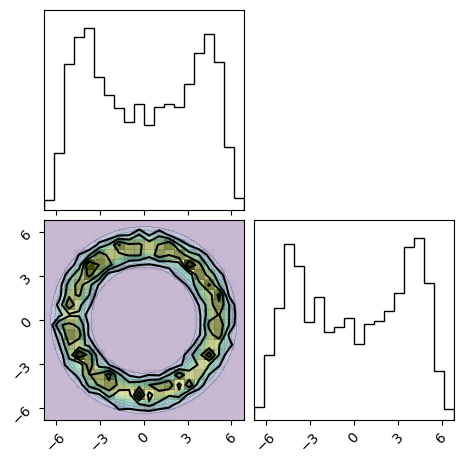

In [9]:
import corner

fig = corner.corner(xs1, weights=ws1, range=[0.999]*2, plot_datapoints=False)

plt.subplot(223)
plt.contourf(x, y, z, alpha=0.3)